# **Street View Housing Number Digit Recognition**

In [106]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.0'

In [107]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

**Load Dataset**

In [108]:
import h5py

h5f = h5py.File('/content/drive/MyDrive/Colab Notebooks/SVHN_single_grey1.h5', 'r')

h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [109]:
#Loading the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


Let's visualize some numbers using matplotlib

Label: 4


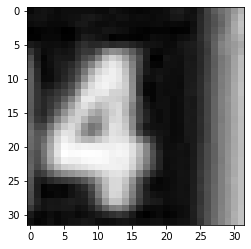

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[2007]))
plt.imshow(X_train[2007], cmap='gray')

**Print shape of the data**

In [79]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


**Reshape features**

In [80]:
X_train = X_train.reshape(42000, 1024)
print(X_train.shape)
X_test = X_test.reshape(18000, 1024)
print(X_test.shape)

(42000, 1024)
(18000, 1024)


**Normalize features**


*   Normalize features from 0-255 to 0-1




In [81]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(X_train.max())
print(X_train.min())
X_train = X_train / 255
X_test = X_test / 255

print(X_train.max())
print(X_train.min())

254.9745
0.0
0.9999
0.0


**One-hot encode the class vector**

*   convert class vectors (integers) to binary class matrix
*   convert y_train and y_test
*   number of classes: 10


In [82]:
print(y_train[10])
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)
print(y_train[10])

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


**Let's see some other images and their labels**

label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


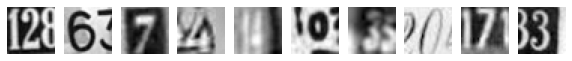

In [83]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train[0:10][i])))
plt.show()

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.layers import BatchNormalization, Dropout

**Basic Model**

In [85]:
def svhn_model():
  output_nodes = 10
  model = Sequential()
  model.add(Dense(512, input_shape=(1024,), activation='relu', kernel_initializer='he_normal'))

  model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
  model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
  model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
  model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))

  model.add(Dense(output_nodes, activation='softmax'))
  adam = optimizers.Adam(lr = 0.0001)
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

  # Fit the model
  return model

In [86]:
model = svhn_model()
model.fit(X_train, y_train, epochs=50, batch_size=200, verbose= 1)

Epoch 1/50
210/210 [==============================] - 4s 19ms/step - loss: 2.2775 - accuracy: 0.1502
Epoch 2/50
210/210 [==============================] - 4s 18ms/step - loss: 1.8998 - accuracy: 0.3851
Epoch 3/50
210/210 [==============================] - 4s 18ms/step - loss: 1.4876 - accuracy: 0.5465
Epoch 4/50
210/210 [==============================] - 4s 18ms/step - loss: 1.2927 - accuracy: 0.6133
Epoch 5/50
210/210 [==============================] - 4s 18ms/step - loss: 1.1887 - accuracy: 0.6425
Epoch 6/50
210/210 [==============================] - 4s 19ms/step - loss: 1.1007 - accuracy: 0.6720
Epoch 7/50
210/210 [==============================] - 4s 19ms/step - loss: 1.0545 - accuracy: 0.6843
Epoch 8/50
210/210 [==============================] - 4s 19ms/step - loss: 1.0155 - accuracy: 0.6935
Epoch 9/50
210/210 [==============================] - 5s 23ms/step - loss: 0.9797 - accuracy: 0.7039
Epoch 10/50
210/210 [==============================] - 4s 21ms/step - loss: 0.9436 - accura

In [87]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Accuaracy on training data:", score[1])

Accuaracy on training data: 0.8639761805534363


In [88]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 2s 3ms/step - loss: 0.6562 - accuracy: 0.8148


In [89]:
print("Test Accuracy: ", results[1])

Test Accuracy:  0.8147777915000916


In [90]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_37 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_38 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_39 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_40 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_41 (Dense)             (None, 10)                330       
Total params: 699,690
Trainable params: 699,690
Non-trainable params: 0
________________________________________________

Basic model gives accuracy of 92.50% on training data and 83.56% on test data, which clearly shows overfitting on training data.

In [91]:
tempDf = pd.DataFrame({'Model':['NN Model'], 'Training Score': score[1],'Test Score':results[1]})
resultsDf = tempDf[['Model' ,'Training Score','Test Score']]
resultsDf

,Model,Training Score,Test Score
0,NN Model,0.863976,0.814778


**Model With Batch Normalization**

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers

def svhn_model_with_normalization():

    ## hyperparameters
    output_nodes = 10

    model = Sequential()
    model.add(Dense(512, input_shape=(1024,), activation='relu', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(output_nodes, activation='softmax'))
    adam = optimizers.Adam(lr = 0.0001)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

In [93]:
model1 = svhn_model_with_normalization()
# Fit the model
model1.fit(X_train, y_train, epochs=50, batch_size=200, verbose= 1)

Epoch 1/50
210/210 [==============================] - 6s 22ms/step - loss: 2.4503 - accuracy: 0.1634
Epoch 2/50
210/210 [==============================] - 5s 22ms/step - loss: 1.7240 - accuracy: 0.4284
Epoch 3/50
210/210 [==============================] - 5s 22ms/step - loss: 1.3170 - accuracy: 0.6020
Epoch 4/50
210/210 [==============================] - 5s 21ms/step - loss: 1.0965 - accuracy: 0.6728
Epoch 5/50
210/210 [==============================] - 4s 21ms/step - loss: 0.9562 - accuracy: 0.7144
Epoch 6/50
210/210 [==============================] - 4s 21ms/step - loss: 0.8602 - accuracy: 0.7410
Epoch 7/50
210/210 [==============================] - 4s 21ms/step - loss: 0.7878 - accuracy: 0.7592
Epoch 8/50
210/210 [==============================] - 4s 21ms/step - loss: 0.7490 - accuracy: 0.7695
Epoch 9/50
210/210 [==============================] - 4s 21ms/step - loss: 0.6914 - accuracy: 0.7863
Epoch 10/50
210/210 [==============================] - 5s 22ms/step - loss: 0.6566 - accura

In [94]:
training_score = model1.evaluate(X_train, y_train, verbose=0)
print("Training Score: ", training_score[1])

Training Score:  0.8861666917800903


In [95]:
test_score = model1.evaluate(X_test, y_test, verbose=0)
print("Test Score: ", test_score[1])

Test Score:  0.7891111373901367


In [96]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_12 (Batc (None, 512)               2048      
_________________________________________________________________
dense_43 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_13 (Batc (None, 256)               1024      
_________________________________________________________________
dense_44 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_14 (Batc (None, 128)               512       
_________________________________________________________________
dense_45 (Dense)             (None, 64)               

In [97]:
tempDf = pd.DataFrame({'Model':['NN with Batch Normalization'], 'Training Score': training_score[1],'Test Score':test_score[1]})
resultsDf = resultsDf.append(tempDf,ignore_index=True)
resultsDf

,Model,Training Score,Test Score
0,NN Model,0.863976,0.814778
1,NN with Batch Normalization,0.886167,0.789111


**Model with Dropout Layer**

In [98]:
def svhn_model_with_dropout():

    ## hyperparameters
    output_nodes = 10

    model = Sequential()
    model.add(Dense(512, input_shape=(1024,), activation='relu', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(output_nodes, activation='softmax'))
    adam = optimizers.Adam(lr = 0.001)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

In [99]:
model2 = svhn_model_with_dropout()
history = model2.fit(X_train, y_train, epochs = 50, batch_size=200, verbose = 1)

Epoch 1/50
210/210 [==============================] - 6s 22ms/step - loss: 2.9111 - accuracy: 0.1002
Epoch 2/50
210/210 [==============================] - 5s 22ms/step - loss: 2.3701 - accuracy: 0.1086
Epoch 3/50
210/210 [==============================] - 5s 23ms/step - loss: 2.2872 - accuracy: 0.1308
Epoch 4/50
210/210 [==============================] - 5s 22ms/step - loss: 2.1884 - accuracy: 0.1680
Epoch 5/50
210/210 [==============================] - 5s 23ms/step - loss: 2.0479 - accuracy: 0.2005
Epoch 6/50
210/210 [==============================] - 5s 22ms/step - loss: 2.0083 - accuracy: 0.2158
Epoch 7/50
210/210 [==============================] - 5s 23ms/step - loss: 1.9541 - accuracy: 0.2330
Epoch 8/50
210/210 [==============================] - 5s 22ms/step - loss: 1.8997 - accuracy: 0.2594
Epoch 9/50
210/210 [==============================] - 5s 23ms/step - loss: 1.8429 - accuracy: 0.2874
Epoch 10/50
210/210 [==============================] - 5s 22ms/step - loss: 1.7551 - accura

In [100]:
training_results = model2.evaluate(X_train, y_train)
test_results = model2.evaluate(X_test, y_test)

563/563 [==============================] - 2s 3ms/step - loss: 0.9258 - accuracy: 0.7217


In [101]:
print('Training accuracy: ', training_results[1])
print('Test accuracy: ', test_results[1])

Training accuracy:  0.7317619323730469
Test accuracy:  0.7217222452163696


In [102]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
dense_49 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
dense_50 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)              

In [103]:
tempDf = pd.DataFrame({'Model':['NN with Dropout layer'], 'Training Score': training_results[1],'Test Score':test_results[1]})
resultsDf = resultsDf.append(tempDf,ignore_index=True)
resultsDf

,Model,Training Score,Test Score
0,NN Model,0.863976,0.814778
1,NN with Batch Normalization,0.886167,0.789111
2,NN with Dropout layer,0.731762,0.721722


**Conclusion:**


*   Basic NN model is giving a good test accuracy compared to models using Batch Normalization and Dropout layer. We can see overfitting issue in the first to model and there is significant difference between training and test accuracy. NN model with dropout layer has solved the overfitting issue majorly due to introduction of dropout layer but the accuracy is still low. 
*   On thing to note, introuducing a CNN layer will definitely improve the model performance and might also resolve overfitting problem.


